In [26]:
import matplotlib as mpl

fsize = 12
mpl.rcParams['legend.fontsize'] = fsize
mpl.rcParams["figure.figsize"] = (6,5)
mpl.rcParams['axes.labelsize'] = fsize
mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': fsize})

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

from scipy.special import laguerre
from scipy.special import roots_laguerre

Potenical efectivo entre dos particulas $\alpha$

$V^{eff}(r) = V_C(r)+\bar{V}(r)+\frac{\hbar^2}{2\mu}\frac{l(l+1)}{r^2}$

$V_C(r) = \frac{1}{4\pi\varepsilon_0}\frac{4e^2}{r} \text{, for } r\geq R_C \approx R_P+R_T =2R_\alpha$

$~~~~~~~~~~~= \frac{1}{4\pi\varepsilon_0}\frac{4e^2}{2R_C}\left(3-\frac{r^2}{R_C^2}\right) \text{, for } r < R_C$

$\bar{V}(r) = -V_0e^{-r^2/\bar{R}^2}$

(-60.0, 60.0)

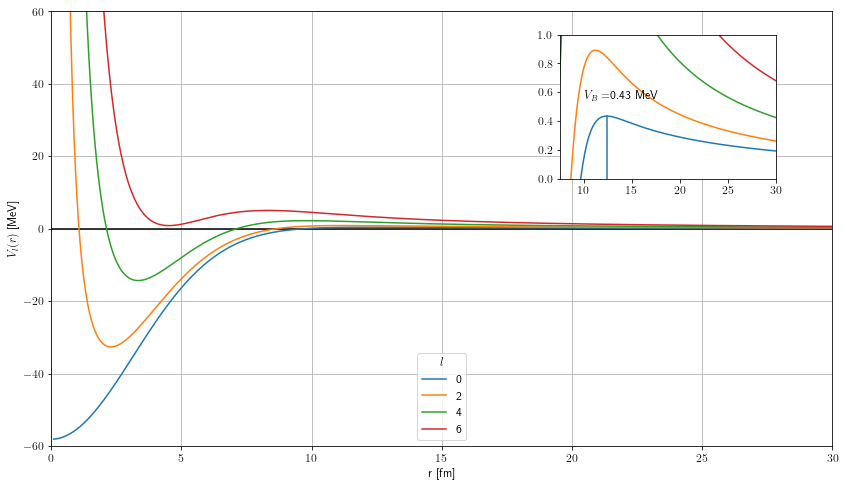

In [42]:
m_a_c2 = 3727.3794066 #MeV

mu_c2 = m_a_c2*m_a_c2/(m_a_c2+m_a_c2)

hbar_c = 197.3269804 #MeV fm

hb2_2mu = (hbar_c**2)/(2*mu_c2)

R_C = 4.5 #fm == R_bar
V_0 = 60 #MeV

e2_4pie0 = 1.44 #MeV fm

def V_C(x):
    if x>R_C:
        return 4*e2_4pie0/x
    else:
        return e2_4pie0*(2/R_C)*(3-(x/R_C)**2)
    
def V_bar(x):
    return -V_0*np.exp(-(x/R_C)**2)

def V_eff(x, l):
    return V_C(x) + V_bar(x) + hb2_2mu*l*(l+1)/(x**2)

x = np.linspace(0.1, 30, 1000)

l_list = np.arange(0, 7, 2)
#l_list = [1]

fig, ax = plt.subplots(1,1, figsize=(14,8))

ax.axhline(y=0, color='k')

axins = inset_axes(ax, 3,2 , loc=1,bbox_to_anchor=(0.85, 0.85),bbox_transform=ax.figure.transFigure)

for l_id, l in enumerate(l_list):
    V_eff_values = np.vectorize(V_eff)(x, l)

    ax.plot(x, V_eff_values, label=str(l))
    axins.plot(x, V_eff_values)

    if l==0:
        index_max = np.argmax(V_eff_values)
        max_x = x[index_max]
        max_y = V_eff_values[index_max]
        axins.axvline(x=max_x, ymin=0, ymax=max_y)
        axins.text(x=10, y=0.55, s=r'$V_B=$'+str(round(max_y,2))+' MeV')

ax.set_xlabel(r'r [fm]')
ax.set_ylabel(r'$V_l(r)$ [MeV]')

ax.legend(title=r"$l$", loc='lower center')

ax.grid()

ax.set_xlim(0,30)
ax.set_ylim(-60,60)

# sub region of the original image
x1, x2, y1, y2 = 7.5, 30, 0, 1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#plt.yscale(value='log')

funciones de Lagrange-Legendre

$\phi_i(r)=(-1)^{N+i}\left(\frac{r}{ax_i}\right)^n\sqrt{ax_i(1-x_i)}\frac{P_N(2r/a-1)}{r-ax_i}$

pagina 43: elementos de matriz cinética 

$\bra{\phi_i}T_0+L(0)\ket{\phi_i}=\frac{(4N^2+4N+3)x_i(1-x_i)-6x_i+1}{3a^2x_i^2(1-x_i)^2}$

$\bra{\phi_i}T_0+L(0)\ket{\phi_j}=\frac{(-1)^{i+j}}{a^2[x_ix_j(1-x_i)(1-x_j)]^{1/2}}\left[N^2+N+1+\frac{x_i+x_j-2x_ix_j}{(x_i-x_k)^2}-\frac{1}{1-x_i}-\frac{1}{1-x_j}\right]$